## Importing and Cleaning

#### Running all the videos - classifying objects - and pickle object_id of vehicles and pedestrains

In [1]:
def classify(max_objects, df_positions):
    veh_id=[]
    ped_id=[]
    for i in range(max_objects):
        temp=df_positions.loc[df_positions['object_id'] == i].reset_index(drop=True)
        

        x_diff = (temp['x_coordinate'][temp.shape[0]-1]-temp['x_coordinate'][0])
        y_diff = (temp['y_coordinate'][temp.shape[0]-1]-temp['y_coordinate'][0])

    #If you want to print the differences for every object, uncomment the two lines below    
    # =============================================================================
    #     print('Diff in X for '+ str(i) + ' is ' +str(x_diff))
    #     print('Diff in Y for '+ str(i) + ' is ' +str(y_diff))
    #     print('\n\n')
    # =============================================================================


        if abs(x_diff) > 15:
            veh_id.append(i)
        elif abs(y_diff) > 2:
            ped_id.append(i)
        
    return veh_id, ped_id

#x,y=classify(max_objects, df_positions)
#print x,y

In [2]:
delta_t=1./30
def SQL_to_Pandas(filename):
    #=============================================================
    ## COMMENT TO PROCESS ALL THE DATABASES
    #=============================================================
    con = sqlite3.connect(path+filename)

    #Defining The number of objects we have
    sql_command = "SELECT COUNT(*) FROM objects"

    max_objects_sql = con.execute(sql_command)
    max_objects = max_objects_sql.fetchone()
    max_objects=max_objects[0]

    ## Using the SQL command
    # Getting the positions of every object
    df_positions = pd.read_sql_query("SELECT a.object_id,  b.frame_number, x_coordinate, y_coordinate\
    FROM objects_features AS a \
    JOIN positions AS b ON a.trajectory_id = b.trajectory_id",con)

    # Getting the velocities of every object
    df_velocities = pd.read_sql_query("SELECT a.object_id,  b.frame_number, b.x_coordinate, b.y_coordinate\
    FROM objects_features AS a \
    JOIN velocities AS b ON a.trajectory_id = b.trajectory_id",con)


    # Merging the velocities and positions
    df = pd.DataFrame()

    df=df_positions.copy()
    df['v_x']=df_velocities['x_coordinate']
    df['v_y']=df_velocities['y_coordinate']
    
    df.columns = ['object', 'frame', 'x', 'y', 'v_x', 'v_y']
    
    #Compute the velocities:
    
#     df['v_x']=(df['x'].shift(1)-df['x'].shift(-1))/2/delta_t
#     df['v_y']=(df['y'].shift(1)-df['y'].shift(-1))/2/delta_t

    #=============================================================
    
    # UNCOMMENT IF YOU WOULD LIKE TO COMPUTE THE AVERAGE OVER THE TRAJECTORIES

    df=df.groupby(['object','frame']).mean().reset_index()
    #Dropping elements with nan
    df=df.dropna(axis=0, how='any')
    df_positions=df_positions.dropna(axis=0, how='any')
    
    return df, df_positions, max_objects

In [3]:
# df=df.dropna(axis=0, how='any')
# #Check if there are any values NaN in the database

# print df['v_x'].isnull().any().any(), df['v_x'].isnull().sum().sum()
# print df['v_y'].isnull().any().any(), df['v_y'].isnull().sum().sum()


In [4]:
import sqlite3
from pandas.io.sql import read_sql
from sqlalchemy import create_engine
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#Get files from directory:
import os
import timeit
#=============================================================
## -------- ADD PATH TO THE SQLITE FILE!!! ------------------
path = 'C:\\Users\\admin\\Desktop\\Capstone\\Final SQL\\revised_0206_1228\\'

#for loop to go over all the databases
for filename in os.listdir(path):
#     if filename=='clip_1.sqlite':
    
        [df, df_positions, max_objects]=SQL_to_Pandas(filename)

        #=============================================================
        ## UNCOMMENT TO PLOT
        for i in range(max_objects):
            X0=pd.Series.tolist((df.loc[df['object'] == i])['x'])
            Y0=pd.Series.tolist((df.loc[df['object'] == i])['y'])
            
            VX0=pd.Series.tolist((df.loc[df['object'] == i])['v_x'])
            VY0=pd.Series.tolist((df.loc[df['object'] == i])['v_y'])
            T0=np.linspace(0,len(VX0),len(VX0))
            
#             plt.subplot(1,2,1)
            plt.scatter(X0,Y0)
            plt.xlabel("X positions")
            plt.ylabel("Y positions")

#             plt.subplot(1,2,2)
#             plt.scatter(T0,VX0)
#             #plt.scatter(T0,VY0)
#             plt.xlabel("X speed")
#             plt.ylabel("Y speed")
            plt.title("Trajectories of moving objects of"+ filename)
#         plt.show()
        #=============================================================

        ## --------------- Classification  --------------------------

        veh_id,ped_id=classify(max_objects,df_positions)


        #=============================================================
        ## UNCOMMENT TO SEE THE VEHICLES AND PEDESTRIANS ID

        #print veh_id,ped_id

        len_max=max(len(veh_id), len(ped_id))
        veh_id_bis=[-1 for i in range(len_max)]
        ped_id_bis=[-1 for i in range(len_max)]
        for i in range(len(veh_id)):
            veh_id_bis[i]=veh_id[i]
        for i in range(len(ped_id)):
            ped_id_bis[i]=ped_id[i]
        #print veh_id_bis, ped_id_bis
        #============================================================= 

        pairing = {'veh_id': veh_id_bis, 'ped_id': ped_id_bis}
        #df_pairing = pd.DataFrame(data=pairing)
        #df_pairing.to_pickle("obj_ID_"+filename)


## Pairing output

In [5]:
inter=pd.read_csv('pairs_0206_1228A.csv')
inter=inter.drop(['Unnamed: 0'], axis=1)
inter

,clip,ped_id,veh_id
0,clip_1,8,14
1,clip_2,28,23
2,clip_3,23,7
3,clip_4,15,10
4,clip_6,35,34
5,clip_7,32,17
6,clip_8,8,3
7,clip_8,8,7
8,clip_8,8,22
9,clip_8,25,22


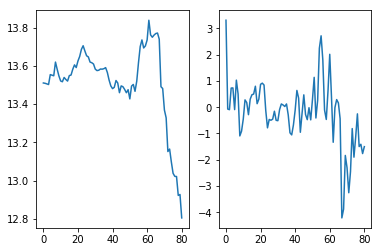

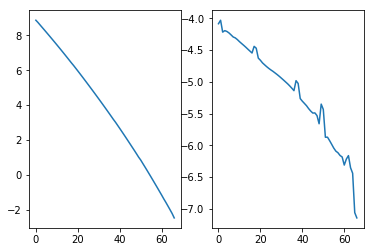

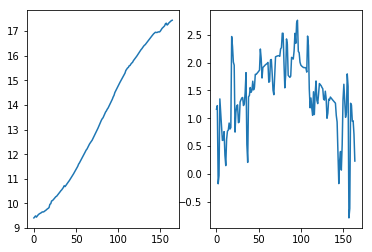

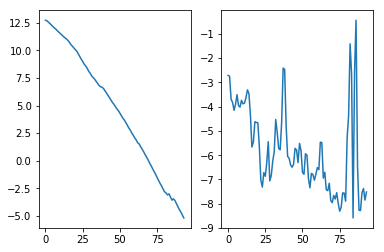

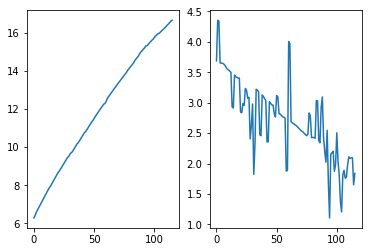

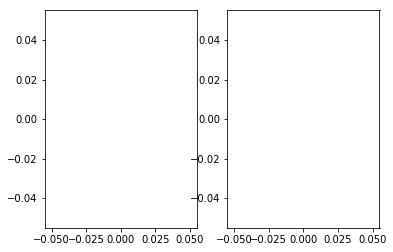

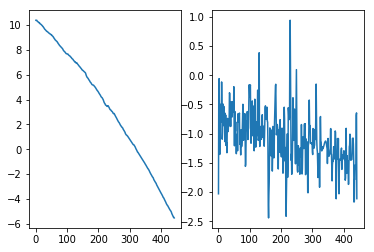

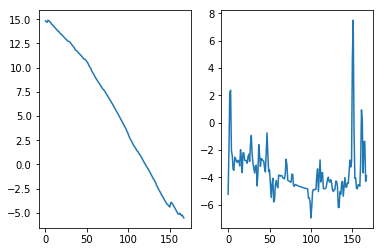

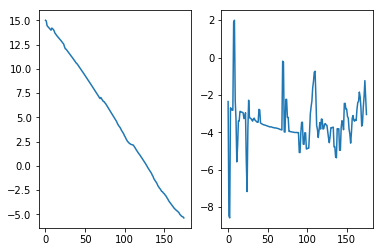

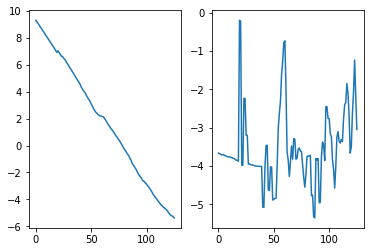

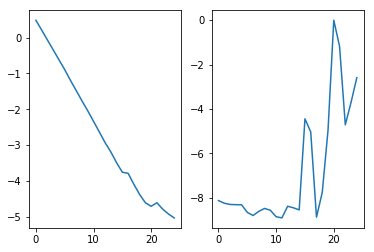

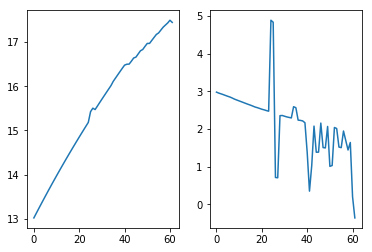

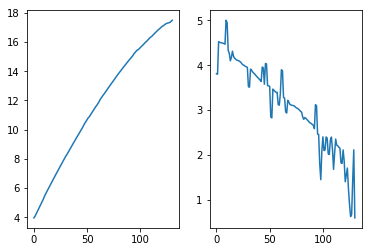

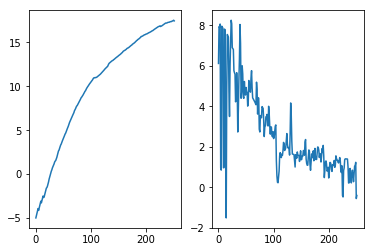

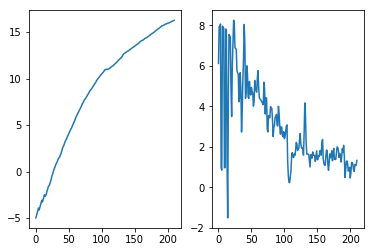

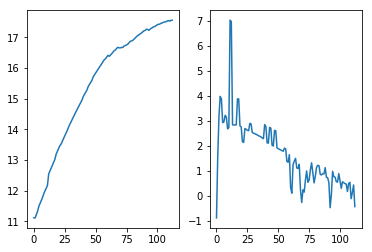

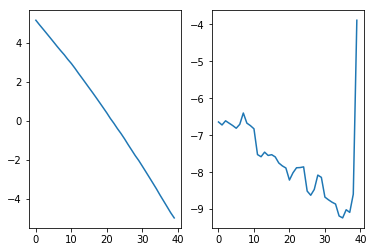

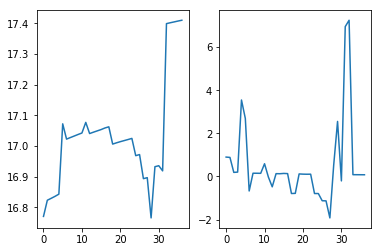

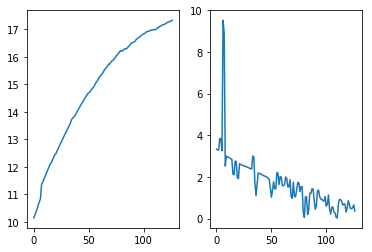

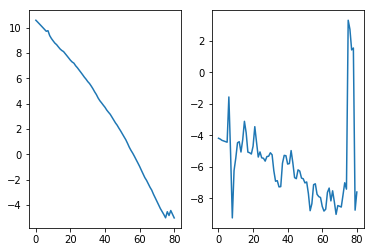

In [10]:
k=0
len_inter=0
for i in range(len(inter.index)):
#     if i==4:
        [df, df_positions, max_objects]=SQL_to_Pandas(inter.iloc[i,0]+'.sqlite')

        veh_iden=int(inter.iloc[i,2])
        ped_iden=int(inter.iloc[i,1])

        vehicle=df.loc[df['object'] == veh_iden]    
        pedestrian=df.loc[df['object'] == ped_iden]

        interaction = pd.merge(vehicle, pedestrian, how ='inner', on = ['frame'])
        len_inter= len_inter+ len(interaction.index)
        interaction.columns = ['object1', 'frame', 'x1', 'y1', 'v_x1', 'v_y1', 'object2', 'x2', 'y2', 'v_x2', 'v_y2']
        if k==0:
            all_interactions=interaction.copy()
        else:
            frames = [all_interactions, interaction]
            all_interactions = pd.concat(frames)
        k=k+1

        interaction['x1']=interaction.filter(items=['x1'])
        interaction['v_x1']=(interaction['x1'].shift(-1)-interaction['x1'].shift(1))/(2*delta_t)
        interaction['v_y1']=(interaction['y1'].shift(-1)-interaction['y1'].shift(1))/(2*delta_t)
        interaction=interaction.dropna(axis=0, how='any')
        interaction=interaction[:-1]
        
        #plotting 
        X0=pd.Series.tolist(interaction['x1'])
        Y0=pd.Series.tolist(interaction['y1'])
        VX0=pd.Series.tolist(interaction['v_x1'])
        VY0=pd.Series.tolist(interaction['v_y1'])
        plt.subplot(1,2,1)
        plt.plot(X0)
        plt.subplot(1,2,2)
        plt.plot(VX0)
        plt.show()
#         print (8.7348-9.0071)/2/delta_t
#         print (8.5937-8.8623)/2/delta_t
#         print interaction
                
    # print all_interactions.shape
    # print all_interactions.head()
    # print len(all_interactions.index)
    # print len_inter

## Careful, the velocities are off! Better calculate them manually to get real brake/Not brake output

In [80]:
# calculate relative 
MLInput = pd.DataFrame()
MLInput['frame'] = all_interactions['frame']
MLInput['relative_X'] = all_interactions['x1'] - all_interactions['x2']
MLInput['relative_Y'] = all_interactions['y1'] - all_interactions['y2']
MLInput['relative_Vx'] = all_interactions['v_x1'] - all_interactions['v_x2']
MLInput['relative_Vy'] = all_interactions['v_y1'] - all_interactions['v_y2']
MLInput['brake'] = 0
#MLInput.columns = ['frame','relative_X','relative_Y','relative_Vx','relative_Vy','brake']


for frame in all_interactions['frame']:
    if len(all_interactions.loc[all_interactions['frame']==frame-1]['v_x1'].values)>0: 
        v_prev = all_interactions.loc[all_interactions['frame']==frame-1]['v_x1'].values[0]
        v = all_interactions.loc[all_interactions['frame']==frame]['v_x1'].values[0]
        if v - v_prev < 0:
            MLInput.loc[MLInput['frame']==frame,'brake'] = 1
        
MLInput.head()
MLInput.to_csv("Input1")

In [81]:
MLInput.head()
print len(MLInput.index)

2572


In [82]:
## Features: Angle, derivative of angle, time to pedestrian
delta_time=15 #seconds

MLInput2 = pd.DataFrame()
Intermediate = pd.DataFrame()

Intermediate['direction']=(MLInput['relative_Vx']>=0).astype(int)+ (MLInput['relative_Vx']<0).astype(int)*(-1)
Intermediate['X_r']=MLInput['relative_X']*Intermediate['direction'] # Check the direction though!
Intermediate['Y_r']=MLInput['relative_Y']*Intermediate['direction']

#Create the new features
MLInput2['alpha']=np.abs(np.arctan2(Intermediate['Y_r'],Intermediate['X_r']))*180/np.pi
MLInput2['delta_alpha']=(MLInput2['alpha'].shift(1)-MLInput2['alpha'])/delta_time
MLInput2['tt_ped']=abs(MLInput['relative_X']/all_interactions['v_x1'])
MLInput2['brake']=MLInput['brake']
MLInput2=MLInput2.dropna(axis=0, how='any')

#changing all the data for when the angle alpha is >90 degree
#MLInput2['brake']=MLInput2['brake']*(MLInput2['alpha']<90).astype(int)
MLInput2.to_csv("Input2")
MLInput2

,alpha,delta_alpha,tt_ped,brake
1,156.031596,-8.622779,19.620456,1
2,155.594912,0.029112,20.119584,1
3,154.833556,0.050757,20.019354,0
4,154.546683,0.019125,20.336130,1
5,26.392314,8.543625,12.947456,0
6,153.392158,-8.466656,232.381988,1
7,153.190036,0.013475,106.970483,0
8,154.663096,-0.098204,5.394917,1
9,153.832826,0.055351,13.056898,0
10,153.489421,0.022894,21.470093,0
